<a href="https://colab.research.google.com/github/RioDeMilo/RETAIL-PRICES-COLOMBIA/blob/main/IPC1823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Here it is all the libraries that i need in order to manage the data and to plot it `
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# for this project i previously modified all the data from each year of analysis to a sngle sheet page in excel. 
df = pd.read_excel('/content/Gropu19-22.xlsx')

In [41]:
# This will get you the specified sheet page for further use.
# but for this case i used a excel file ith only one page so it is not necessary and you need to ad the datafrme and a dicttionary ith the name of the pages like
# sheet_name=['Hoja1']
#df = df.get('Hoja1')


In [42]:
# typical use of .info() to get a general idea of what is the shape  of the data base look like
# .head() will let you see a more friendly view in a excel way 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220517 entries, 0 to 220516
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Fecha                   220517 non-null  datetime64[ns]
 1   Grupo                   220517 non-null  object        
 2   Producto                220517 non-null  object        
 3   Fuente                  220517 non-null  object        
 4   Precio  por kilogramo*  220517 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.4+ MB


,Fecha,Grupo,Producto,Fuente,Precio por kilogramo*
0,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0
1,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0
2,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0
3,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0
4,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0


In [43]:
df.rename(columns={"Precio  por kilogramo*": "Precio kg"}, inplace=True)

In [44]:
# this is to set the 'Fecha' as the new index of the dataframe as it will mostly be a timeline analysis
# the inplace=True will set this ne index as the definitive index changing it in the database
df.set_index('Fecha', inplace=True)
df.head()

,Grupo,Producto,Fuente,Precio kg
Fecha,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0


In [45]:
# Here we can see that there are not null values in any of the columns
# if there were any null values we should take them into consideration because it can affect later anaylsis an graphing
pd.isnull(df).sum()

Grupo        0
Producto     0
Fuente       0
Precio kg    0
dtype: int64

In [46]:
# Here i'm seeing that the city is contained in the same column as the retailer center 
# we need to solve this after starting to gragh and do an analysis
df['Fuente'].value_counts()

Medellín, Central Mayorista de Antioquia       10154
Bogotá, D.C., Corabastos                        8070
Cúcuta, Cenabastos                              6865
Villavicencio, CAV                              6383
Ibagué, Plaza La 21                             6214
                                               ...  
Malambo, Atlantico                                46
Malambo (Atlántico), Carnes y Carnes              23
Ipiales (Nariño), Centro de Acopio                18
San Gil (Santander), Panela                        4
San Sebastián de Mariquita (Tolima), panela        3
Name: Fuente, Length: 91, dtype: int64

In [47]:
# the process of split the values that have both the city and the retail market need to be in a independet column
# but here you can see that there are values in the data base that have more than one comma that is dividing the values 
# bogota dc, corabastos should not have two commas only the comma that is differentiating it from a city and a market in the city
# we want then to get only two columns and not three
# i first used str.split but it split the string everytime that it find a comma
# it's best to use str.rsplit as it will start from the end to find a delimeter
df[['Ciudad','Plaza']] = df.Fuente.str.rsplit(',',n=1, expand = True)

In [48]:
# in the star of the dataframe we can see that there are valuess that include the city but not the marketplace 
# it is important to take this into consideration
df.head()


,Grupo,Producto,Fuente,Precio kg,Ciudad,Plaza
Fecha,,,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0,Armenia,Mercar
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0,Barranquilla,Barranquillita
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0,"Bogotá, D.C.",Corabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0,Bucaramanga,Centroabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0,Chiquinquirá (Boyacá),None


In [49]:
# here we count every vale from 0 to 50 to see whether there is a city misspelled

df.Ciudad.value_counts()[0:49]

Bogotá, D.C.                        18734
Medellín                            15561
Cali                                14576
Barranquilla                         9971
Cúcuta                               9715
Pereira                              8878
Bucaramanga                          8756
Villavicencio                        6383
Ibagué                               6214
Valledupar                           5986
Montería                             5959
Armenia                              5921
Popayán                              5647
Palmira (Valle del Cauca)            5523
Manizales                            5514
Neiva                                5476
Tuluá (Valle del Cauca)              5420
Cartagena                            5350
Sincelejo                            5249
Pasto                                4864
Tunja                                4837
Cartago (Valle del Cauca)            4716
Buenaventura (Valle del Cauca)       4320
Pamplona (Norte de Santander)     

In [50]:
# i droped the Fuente value as it will not give me any value since 
# you will need the city and maybe a specific retail market called "Plaza"
df = df.drop(['Fuente'],axis=1)
# here you can confirm that the data base is still the same only without the "Fuente" Column
df.head()

,Grupo,Producto,Precio kg,Ciudad,Plaza
Fecha,,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1065.0,Armenia,Mercar
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,3000.0,Barranquilla,Barranquillita
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,764.0,"Bogotá, D.C.",Corabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1556.0,Bucaramanga,Centroabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1058.0,Chiquinquirá (Boyacá),None


In [51]:
# this is another part of the data cleaning and filtering 
#we see duplicates with differences in the upper letters
df['Grupo'].value_counts()


FRUTAS                           53015
VERDURAS Y HORTALIZAS            43664
CARNES                           32565
PROCESADOS                       32080
TUBERCULOS, RAICES Y PLATANOS    16948
GRANOS Y CEREALES                13366
PESCADOS                         10352
LACTEOS Y HUEVOS                  9418
Frutas                            2261
Verduras y Hortalizas             1893
Carnes                            1429
Procesados                        1387
Tubérculos, Raíces y Plátanos      704
Granos y Cereales                  578
Pescados                           448
Lácteos y Huevos                   409
Name: Grupo, dtype: int64

In [52]:
# as you can see the str.lower will change all the 
# upper letters for lower case
df['Grupo'] = df['Grupo'].str.lower()

df['Grupo'].value_counts()

frutas                           55276
verduras y hortalizas            45557
carnes                           33994
procesados                       33467
tuberculos, raices y platanos    16948
granos y cereales                13944
pescados                         10800
lacteos y huevos                  9418
tubérculos, raíces y plátanos      704
lácteos y huevos                   409
Name: Grupo, dtype: int64

In [53]:
# you can se the dict of values that i'm going to replce with the .replace function
dic = {'é': 'e', 'í': 'i','á':'a'}

In [54]:
df.replace(dic, regex=True, inplace=True)

In [55]:
df['Grupo'].value_counts()

frutas                           55276
verduras y hortalizas            45557
carnes                           33994
procesados                       33467
tuberculos, raices y platanos    17652
granos y cereales                13944
pescados                         10800
lacteos y huevos                  9827
Name: Grupo, dtype: int64

In [56]:
# now we need to see wheter there may be other values such as ó or ú 
# for this we need to analyse the other types of products from each category 
# but instead we will find this values and if it exists in the data base
# if those values exists we will addd them to the dictionary to then replace them and get an homogeneus list


In [57]:
# Thiss code reveal that there are no ó or ú in the data base that need to be replaced
# Then the code above of .replace wwill work just fine
df['Grupo'].str.count('ú').sum()


0

In [58]:
# with this simple function we can see the number of products of a specific Group
dfg = df[df['Grupo'].isin(['frutas'])]
dfg['Producto'].value_counts()[0:15]

Tomate de arbol                 2262
Manzana verde importada         1848
Lulo                            1830
Mora de Castilla                1806
Manzana roja importada          1760
Guayaba pera                    1721
Banano criollo                  1709
Pera importada                  1606
Papaya Maradol                  1597
Manzana royal gala importada    1565
Maracuya                        1546
Aguacate papelillo              1533
Mango Tommy                     1521
Limón Tahiti                    1444
Limón común                     1404
Name: Producto, dtype: int64

In [59]:
# here i replace the tring with a value o it is more easy to get values and analyze them witouth touching the principal code
# here noww e dont acll the list inide the iin function
# instead i used a vaariable to store a list that caaan containt all the types of groups of goods
G = ['frutas','verduras y hortalizas']
dfg = df[df['Grupo'].isin(G)]
dfg['Producto'].value_counts()[0:15]


Tomate de arbol            2262
Pimentón                   2106
Habichuela                 1995
Cilantro                   1966
Lechuga Batavia            1899
Pepino cohombro            1873
Manzana verde importada    1848
Lulo                       1830
Mora de Castilla           1806
Manzana roja importada     1760
Chócolo mazorca            1754
Guayaba pera               1721
Banano criollo             1709
Arveja verde en vaina      1612
Pera importada             1606
Name: Producto, dtype: int64

In [60]:
C = ['Bogota, D.C.']
dfp = dfg[dfg['Ciudad'].isin(C)]

In [61]:
dfp

,Grupo,Producto,Precio kg,Ciudad,Plaza
Fecha,,,,,
2019-01-01,verduras y hortalizas,Acelga,764.0,"Bogota, D.C.",Corabastos
2019-01-01,verduras y hortalizas,Ahuyama,1145.0,"Bogota, D.C.",Corabastos
2019-01-01,verduras y hortalizas,Ahuyamin (Sakata),766.0,"Bogota, D.C.",Corabastos
2019-01-01,verduras y hortalizas,Ajo,8701.0,"Bogota, D.C.",Corabastos
2019-01-01,verduras y hortalizas,Ajo importado,3768.0,"Bogota, D.C.",Corabastos
...,...,...,...,...,...
2022-12-01,frutas,Uchuva con cascara,3057.0,"Bogota, D.C.",Corabastos
2022-12-01,frutas,Uva importada,15349.0,"Bogota, D.C.",Corabastos
2022-12-01,frutas,Uva Isabela,3982.0,"Bogota, D.C.",Corabastos


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

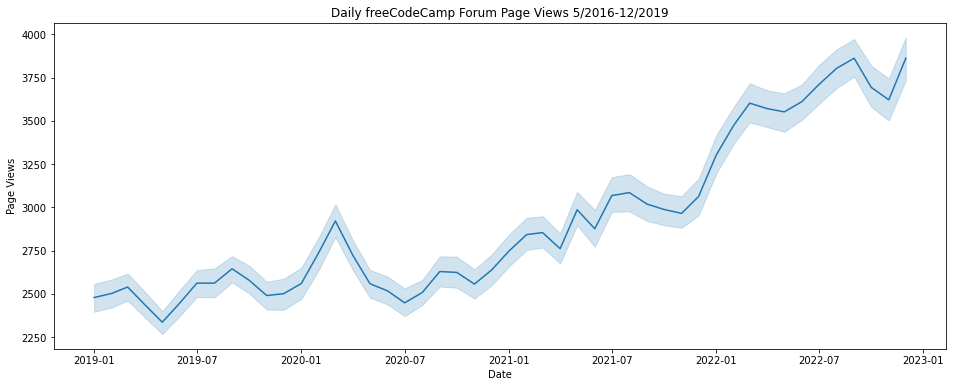

In [62]:
# why are we seeing a strange graph?
# There are different value for the cities all raound the country we need to configure the data to bether understaand this
fig, ax = plt.subplots(figsize=(16, 6)) # thiss saves the fig  in the ax 
ax = sns.lineplot(data=dfg, x="Fecha", y="Precio kg")# the ax value i the plotting of the cart
ax.set(
xlabel="Date",
ylabel="Page Views",
)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

# Data preparing
### Now we want to specify wheter we want to plot a spicified type of product 
but we should be able to see what type of products are available for comparison

```
# Tiene formato de código
```

